# Classify Traffic Signs using LE-NET Architecture in Keras

## Problem Statement

In this case study we are provided with images of traffic signs and the goal is to train signs and the goal is to train Deep Network to classify them.

Traffic sign classification is an important task for self driving cars.

In this project, a Deep Network known as LeNet will be used for traffic sign images classification.

The dataset contains 43 different classes of images. 

Classes are as listed below: 

1. Speed limit (20km/h)
2. Speed limit (30km/h) 
3. Speed limit (50km/h) 
3. Speed limit (60km/h) 
4. Speed limit (70km/h)
5. Speed limit (80km/h)
6. End of speed limit (80km/h) 
7. Speed limit (100km/h)
8. Speed limit (120km/h)
9. No passing
10. No passing for vehicles over 3.5 metric tons
11. Right-of-way at the next intersection
12. Priority road
13. Yield
14. Stop
15. No vehicles
16. Vehicles over 3.5 metric tons prohibited
17. No entry
18. General caution
19. Dangerous curve to the left
20. Dangerous curve to the right
21. Double curve
22. Bumpy road
23. Slippery road
24. Road narrows on the right
25. Road work
26. Traffic signals
27. Pedestrians
28. Children crossing
29. Bicycles crossing
30. Beware of ice/snow
31. Wild animals crossing
32. End of all speed and passing limits
33. Turn right ahead
34. Turn left ahead
35. Ahead only
36. Go straight or right
37. Go straight or left
38. Keep right
39. Keep left
40. Roundabout mandatory
41. End of no passing
42. End of no passing by vehicles over 3.5 metric tons


## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle  #use to open the data

In [2]:
with open('traffic-signs-data/train.p',mode ='rb') as training_data:
    train = pickle.load(training_data)
with open('traffic-signs-data/valid.p',mode ='rb') as validation_data:
    valid = pickle.load(validation_data)
with open('traffic-signs-data/test.p',mode ='rb') as testing_data:
    test = pickle.load(testing_data)    

In [3]:
X_train,y_train = train['features'],train['labels']
X_valid,y_valid = valid['features'],valid['labels']
X_test,y_test = test['features'],test['labels']

In [4]:
X_train.shape,y_train.shape

((34799, 32, 32, 3), (34799,))

In [5]:
X_valid.shape,y_valid.shape

((4410, 32, 32, 3), (4410,))

In [6]:
X_test.shape,y_test.shape

((12630, 32, 32, 3), (12630,))

## Image Exploration

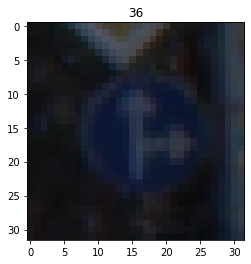

In [7]:
plt.imshow(X_train[1000])
plt.title(y_train[1000])
plt.show()

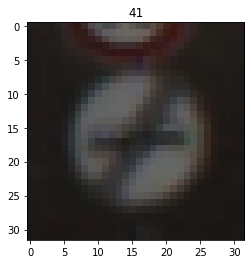

In [8]:
plt.imshow(X_train[7])
plt.title(y_train[7])
plt.show()

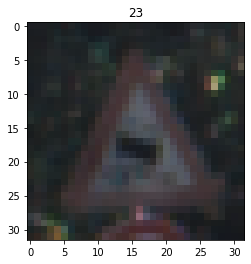

In [9]:
plt.imshow(X_train[2000])
plt.title(y_train[2000])
plt.show()

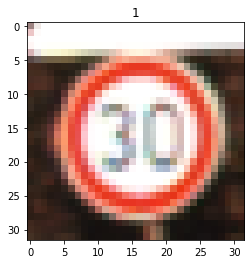

In [10]:
plt.imshow(X_train[3000])
plt.title(y_train[3000])
plt.show()

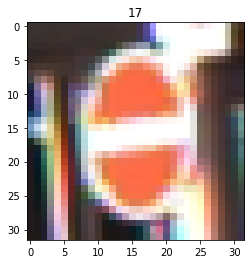

In [11]:
plt.imshow(X_valid[4000])
plt.title(y_valid[4000])
plt.show()

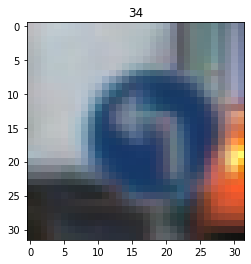

In [12]:
plt.imshow(X_test[2000])
plt.title(y_test[2000])
plt.show()

## Data Preparation

In [13]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [14]:
X_train_gray = np.sum(X_train/3,axis = 3,keepdims = True)
X_valid_gray = np.sum(X_valid/3,axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3,axis = 3, keepdims = True)

In [15]:
X_train_gray.shape,X_valid_gray.shape,X_test_gray.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

In [16]:
X_train_gray_norm = X_train_gray/255
X_test_gray_norm = X_test_gray/255
X_valid_gray_norm = X_valid_gray/255

In [17]:
X_train_gray_norm

array([[[[0.57385621],
         [0.61699346],
         [0.43137255],
         ...,
         [1.        ],
         [0.98562092],
         [0.92026144]],

        [[0.55555556],
         [0.52026144],
         [0.45882353],
         ...,
         [1.        ],
         [0.99607843],
         [0.86928105]],

        [[0.50980392],
         [0.48104575],
         [0.46928105],
         ...,
         [1.        ],
         [0.98823529],
         [0.9620915 ]],

        ...,

        [[0.30718954],
         [0.24705882],
         [0.20522876],
         ...,
         [0.47973856],
         [0.79607843],
         [1.        ]],

        [[0.27973856],
         [0.21960784],
         [0.22614379],
         ...,
         [0.58169935],
         [0.8248366 ],
         [0.99869281]],

        [[0.2627451 ],
         [0.25359477],
         [0.30980392],
         ...,
         [0.50457516],
         [0.79869281],
         [0.99477124]]],


       [[[0.65490196],
         [0.66143791],
         [0.66

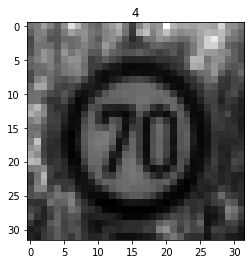

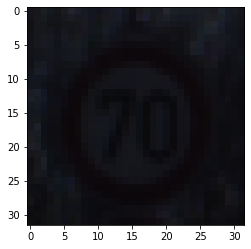

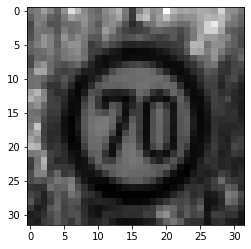

In [18]:
plt.imshow(X_train_gray[610].squeeze(),cmap = 'gray')
plt.title(y_train[610])
plt.figure()
plt.imshow(X_train[610])
plt.figure()
plt.imshow(X_train_gray_norm[610].squeeze(),cmap ='gray')

## Model Training

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [20]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6,kernel_size = (5,5),activation = 'relu',input_shape = (32,32,1)))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

cnn_model.add(Conv2D(filters = 16,kernel_size = (5,5),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120,activation = 'relu'))
cnn_model.add(Dense(units = 84,activation = 'relu'))

cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(units = 43,activation = 'softmax'))


In [21]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [22]:
cnn_model.compile(optimizer = Adam(lr = 0.001),
                 loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

In [23]:
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size = 500,
             epochs = 20,
             verbose = 1,
             validation_data=(X_valid_gray_norm,y_valid))

Epoch 1/20
70/70 [==============================] - 18s 261ms/step - loss: 3.3885 - accuracy: 0.1222 - val_loss: 2.8296 - val_accuracy: 0.3020
Epoch 2/20
70/70 [==============================] - 15s 220ms/step - loss: 2.2665 - accuracy: 0.3906 - val_loss: 1.6077 - val_accuracy: 0.5841
Epoch 3/20
70/70 [==============================] - 16s 225ms/step - loss: 1.4708 - accuracy: 0.5693 - val_loss: 1.0363 - val_accuracy: 0.7268
Epoch 4/20
70/70 [==============================] - 16s 233ms/step - loss: 1.0748 - accuracy: 0.6823 - val_loss: 0.7575 - val_accuracy: 0.8127
Epoch 5/20
70/70 [==============================] - 16s 224ms/step - loss: 0.8627 - accuracy: 0.7445 - val_loss: 0.6656 - val_accuracy: 0.8220
Epoch 6/20
70/70 [==============================] - 16s 223ms/step - loss: 0.7175 - accuracy: 0.7887 - val_loss: 0.5657 - val_accuracy: 0.8478
Epoch 7/20
70/70 [==============================] - 16s 224ms/step - loss: 0.6134 - accuracy: 0.8222 - val_loss: 0.4952 - val_accuracy: 0.8689

## Model Evaluation

In [25]:
score = cnn_model.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy : {:.2f}'.format(score[1]))

395/395 [==============================] - 9s 23ms/step - loss: 0.5069 - accuracy: 0.9003
Test Accuracy : 0.90


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

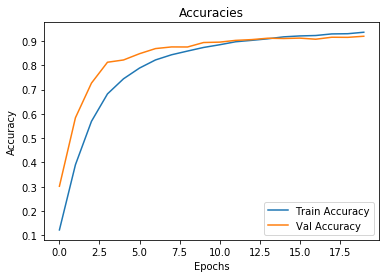

In [35]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy','Val Accuracy'])
plt.show()

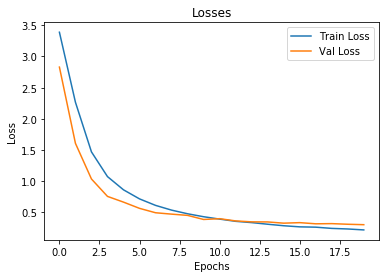

In [36]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss','Val Loss'])
plt.show()

In [40]:
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)

In [41]:
predicted_classes

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

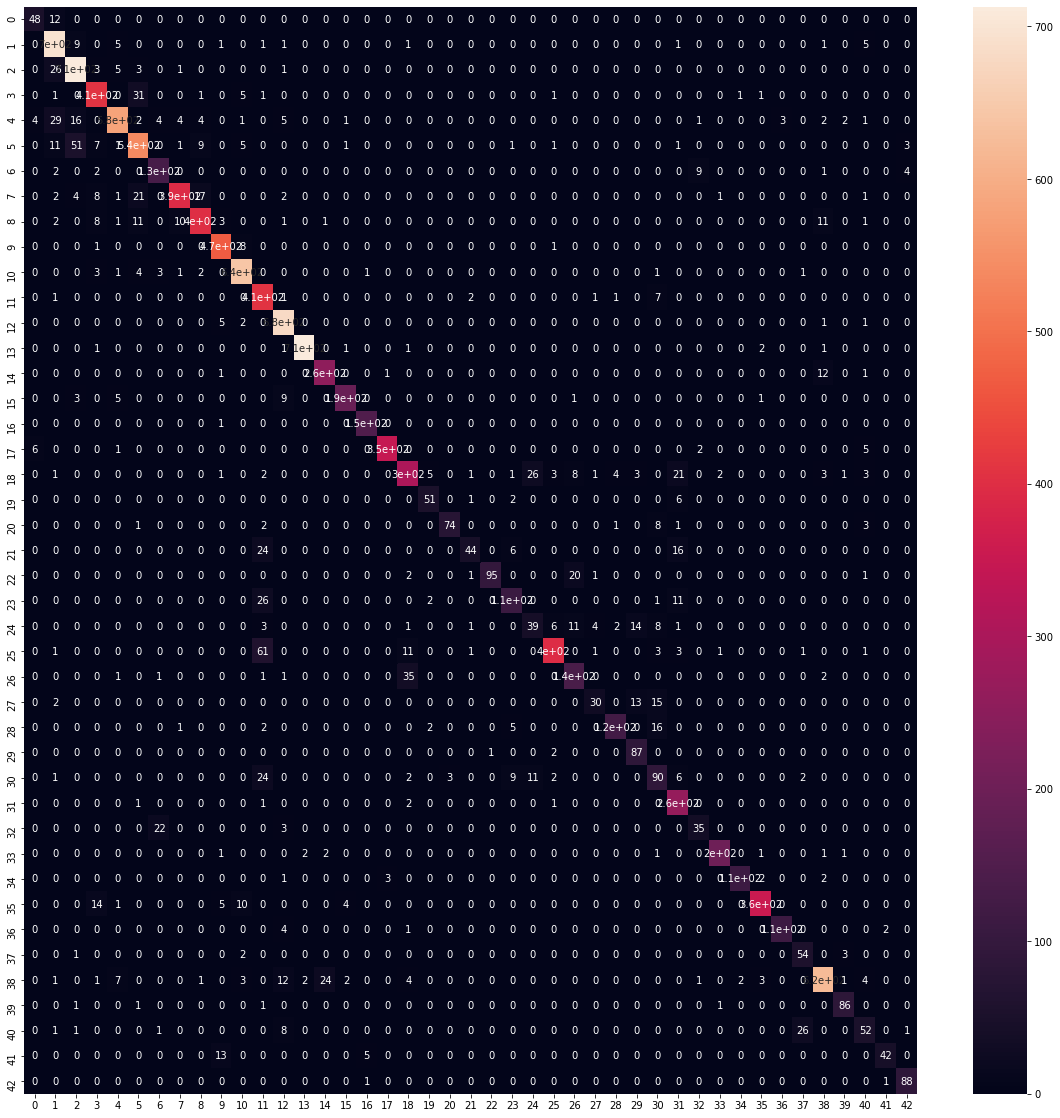

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
plt.figure(figsize =(20,20))
sns.heatmap(cm,annot = True)

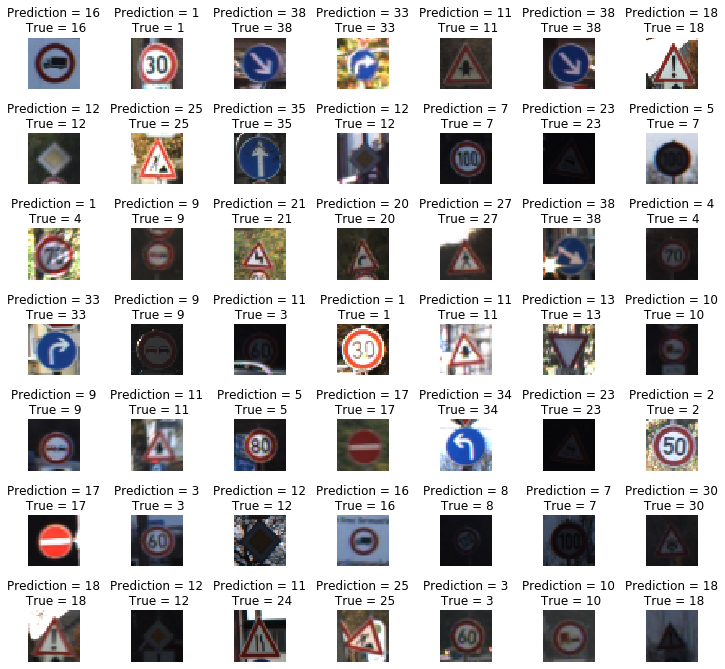

In [58]:
L = 7
W = 7

fig, ax = plt.subplots(L,W,figsize = (12,12))
ax = ax.ravel()
for i in np.arange(0, L*W):
    ax[i].imshow(X_test[i])
    ax[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_test[i]))
    ax[i].axis('off')
plt.subplots_adjust(wspace = 1)